In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import networkx as nx   # python自带
import matplotlib.pyplot as plt

In [2]:
# 定义无向图
G = nx.Graph()

# 定义图中的节点
nodes=['0','1','2','3','4','5','6','7','8']

# 添加节点
G.add_nodes_from(nodes)

# 定义图中的边（权重为1）
edges=[('0','0',1),('0','1',1),('0','5',1),('0','5',2),('1','2',3),('1','4',5),('2','1',7),('2','4',6),('3','5',5),('4','8',4),('6','7',1),('7','8',2),('8','6',3),('8','3',5)]

# 添加边
G.add_weighted_edges_from(edges)

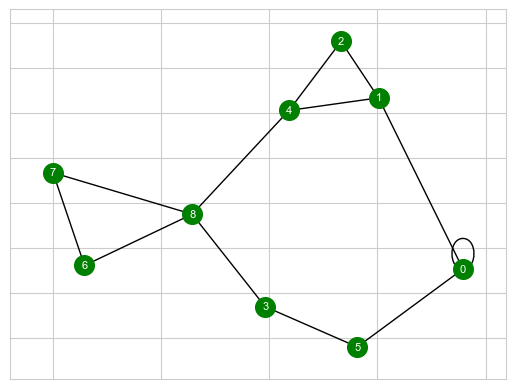

In [3]:
# 画图，节点的位置是随机摆放的
nx.draw_networkx(G,node_color = 'g',with_labels = True,font_color='w',font_size =8,node_size =200)
# plt.show()

In [4]:
# 清除现有图
G.clear()

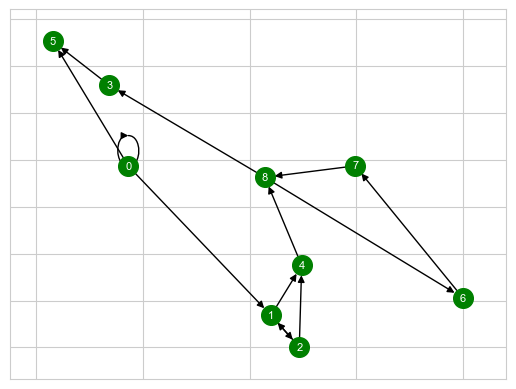

In [5]:
# 定义有向图
G = nx.DiGraph()

# 添加节点和边
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)

# 画图
nx.draw_networkx(G,node_color = 'g',with_labels = True,font_color='w',font_size =8,node_size =200)
# plt.show()

In [6]:
# 度
nx.degree(G)

# 出入度
G.in_degree("1")
G.out_degree("1")

DiDegreeView({'0': 4, '1': 4, '2': 3, '3': 2, '4': 3, '5': 2, '6': 2, '7': 2, '8': 4})

2

2

In [7]:
# 度中心度
nx.degree_centrality(G)

# 紧密中心度
nx.closeness_centrality(G)

# 介度中心度
nx.betweenness_centrality(G)

{'0': 0.5,
 '1': 0.5,
 '2': 0.375,
 '3': 0.25,
 '4': 0.375,
 '5': 0.25,
 '6': 0.25,
 '7': 0.25,
 '8': 0.5}

{'0': 0.0,
 '1': 0.25,
 '2': 0.16666666666666666,
 '3': 0.3402777777777778,
 '4': 0.28125,
 '5': 0.36363636363636365,
 '6': 0.30000000000000004,
 '7': 0.23684210526315788,
 '8': 0.40909090909090906}

{'0': 0.0,
 '1': 0.10714285714285714,
 '2': 0.0,
 '3': 0.10714285714285714,
 '4': 0.25,
 '5': 0.0,
 '6': 0.08928571428571427,
 '7': 0.05357142857142857,
 '8': 0.3571428571428571}

In [8]:
# 社交网络画图案例-权力的游戏
import networkx as nx
import pandas as pd
import matplotlib   # 必须导入，networkx会调用matplotlib的GUI
import matplotlib.pyplot as plt

In [12]:
# 读入数据（关联表）
edge_list=pd.read_csv("C:\Data\Jupyter_file\机器学习\信用卡评分与反欺诈\社交网络code\data\stormofswords.csv")
edge_list.head(5)

,Source,Target,Weight
0,Aemon,Grenn,5
1,Aemon,Samwell,31
2,Aerys,Jaime,18
3,Aerys,Robert,6
4,Aerys,Tyrion,5


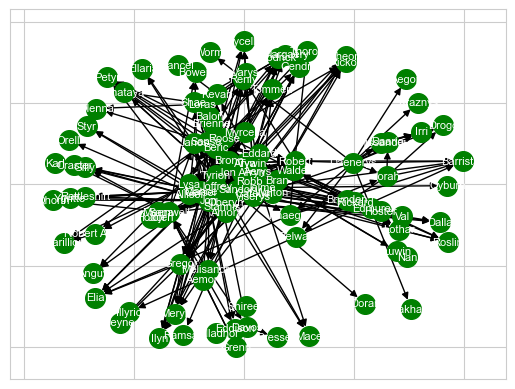

In [13]:
# 定义图
# 清除现有图
G.clear()
G= nx.from_pandas_edgelist(edge_list, source = 'Source', target = 'Target', edge_attr = 'Weight',create_using = nx.DiGraph())

# 画图
nx.draw_networkx(G,node_color = 'g',with_labels = True,font_color='w',font_size =8,node_size =200)
plt.show()

In [14]:
# 银行交易圈，社交发现
import community
# 导入数据
Original_data = pd.read_csv("C:\Data\Jupyter_file\机器学习\信用卡评分与反欺诈\社交网络code\data\Archive-社交网络-交易对手明细汇总.csv",index_col=0,header=0)
Original_data.drop(["统计日期","近六个月转入次数","近六个月转入金额","近六个月转出次数","近六个月转出金额","近六个月交易次数","近六个月交易金额","近六个月交易月份数","近六个月月均交易次数","近六个月月均交易金额","近六个月笔均交易金额","近六个月单笔最大交易金额","近六个月单笔最小交易金额"],inplace=True,axis=1)
Original_data.head(5)

,源客户号,目标客户号,交易圈交易边指标值
1,A1000001,B1001140,0.000429
2,A1000001,B1001616,0.018686
3,A1000001,B1001901,0.016843
4,A1000002,B1000069,0.000137
5,A1000002,B1000163,0.000086


In [15]:
# 定义图
G.clear()
G= nx.from_pandas_edgelist(Original_data,"源客户号","目标客户号",edge_attr=True)

# 计算最优切割
partition = community.best_partition(G)

# 查看结果
partition

{'A1000001': 0,
 'B1001140': 0,
 'B1001616': 0,
 'B1001901': 0,
 'A1000002': 1,
 'B1000069': 1,
 'B1000163': 1,
 'B1000196': 1,
 'B1000469': 1,
 'B1000500': 1,
 'B1000507': 1,
 'B1000848': 1,
 'B1000909': 1,
 'B1001896': 1,
 'B1002152': 1,
 'B1002175': 1,
 'B1002360': 1,
 'B1002373': 1,
 'B1002374': 1,
 'B1002788': 1,
 'B1002894': 1,
 'B1003482': 1,
 'B1003953': 1,
 'B1004059': 1,
 'B1004132': 1,
 'B1004261': 1,
 'B1004265': 1,
 'B1004563': 1,
 'B1004564': 1,
 'B1004565': 1,
 'B1004566': 1,
 'B1004567': 1,
 'B1004569': 1,
 'B1004570': 1,
 'B1004571': 1,
 'B1004572': 1,
 'B1004573': 1,
 'B1004574': 1,
 'B1004575': 1,
 'B1004576': 1,
 'B1004577': 1,
 'B1004578': 1,
 'B1004579': 1,
 'B1004580': 1,
 'B1004581': 1,
 'B1004582': 1,
 'B1004583': 1,
 'B1004584': 1,
 'B1004585': 1,
 'B1004615': 1,
 'B1005205': 1,
 'B1005960': 1,
 'A1000003': 2,
 'B1000373': 2,
 'B1000632': 2,
 'B1001463': 2,
 'B1002068': 2,
 'B1002527': 2,
 'B1002652': 2,
 'B1003315': 2,
 'B1003636': 2,
 'B1003637': 2,
 'B10036

In [17]:
len(set(partition.values()))   # 查看聚类数量
Original_data.shape

343

(6903, 3)